# Análisis y visualización de datos con Python

La visualización científica es una disciplina que se enfoca en la generación de representaciones efectivas de los datos científicos para su exploración, su análisis y su comunicación efectiva.

Python nos da acceso a toda una diversidad de alternativas para producir visualizaciones estáticas y dinámicas, tanto en 2D como en 3D. En particular, el paquete [Matplotlib](https://matplotlib.org/) es la opción más empleada para la visualización y se encuentra integrada en varios pilares de la plataforma científica de Python, como son: Pandas, IPython y Jupyter.

## Matplotlib
La forma acostumbrada de importar Matplotlib es mediante la siguiente instrucción:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

El siguiente `comándo mágico` de IPython le indica a Jupyter que los gráficos generados deberían ser desplegados en la libreta de Jupyter, en lugar de en una ventana independiente:

In [2]:
%matplotlib inline

Matplotlib dispone de distintos estilos, que uno puede escoger para darle una apariencia uniforme a las gráficas. La lista de estilos disponibles se almacena en el objeto: `plt.style.available`:

In [3]:
plt.style.available

['seaborn-paper',
 'seaborn-white',
 'seaborn-talk',
 'seaborn',
 'fast',
 'seaborn-ticks',
 'tableau-colorblind10',
 'dark_background',
 'seaborn-poster',
 'Solarize_Light2',
 'seaborn-colorblind',
 'seaborn-notebook',
 'seaborn-bright',
 'seaborn-deep',
 'grayscale',
 'ggplot',
 '_classic_test',
 'classic',
 'seaborn-muted',
 'seaborn-pastel',
 'seaborn-whitegrid',
 'seaborn-dark',
 'bmh',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'fivethirtyeight']

Para escoger el estilo que queremos usar para nuestras gráficas usamos el método `plt.style.use(estilo)`

In [4]:
plt.style.use("ggplot")

### Creando una nueva figura

Text(0.5,0.98,'Mi primera figura en Matplotlib')

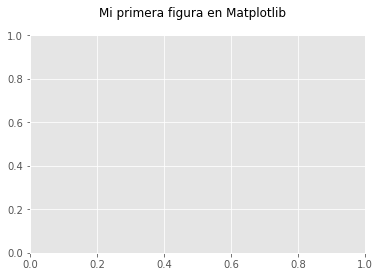

In [5]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
fig.suptitle("Mi primera figura en Matplotlib") #Este es el encabezado de la figura

Matplotlib requiere secuencias típicamente numéricas (listas, tuplas o arreglos de Numpy) para construir una gráfica.

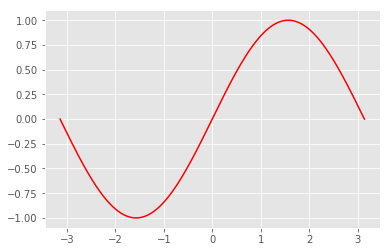

In [6]:
x = np.linspace(-np.pi, np.pi, 1000) #Esta función crea una secuencia de 1000 elementos que divide el rango entre -3.141516 y 3.141516
y = np.sin(x) #y contiene ahora el resultado de aplicar la función seno a cada elemento de la primera secuencia
plt.plot(x, y, "r-") #plt.plot() traza en este caso una línea roja ("r-") que une todos los puntos

En el siguiente ejemplo, generamos dos secuencias al azar y le solicitamos a Matplotlib que creé un gráfico de dispersión o *scatterplot*.

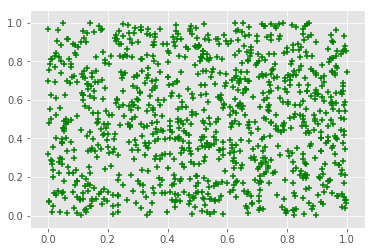

In [7]:
x1 = np.random.random(1000)
y1 = np.random.random(1000)
plt.scatter(x1, y1, c="green", marker="+") # En este caso el color y el tipo de marcador lo seleccionamos mediante los argumentos c y marker, respectivamente

Con Matplotlib también es posible graficar datos categóricos:

In [8]:
import urllib.request

signos = ".,;-_\"'!?()[]"
palabras = []
with urllib.request.urlopen(
    "http://www.gutenberg.org/ebooks/1112.txt.utf-8") as romeo:
    for linea in romeo.readlines():
        linea_limpia = linea.decode("utf8").lower()
        for signo in signos:
            linea_limpia = linea_limpia.replace(signo, "")
        palabras.extend(linea_limpia.split())
len(palabras)

28974

#### Nota:

El código que reemplaza los signos de puntuación en el ejemplo anterior podría implementarse de forma más sintética empleando los métodos `.maketrans()` y `.translate()` asociados a las cadenas de texto o incluso usando [expresiones regulares](https://docs.python.org/3/library/re.html). Por ejemplo:

In [9]:
tabla_traduccion = str.maketrans({letra:None for letra in ".,;-_\"'!?()[]"}) #
"Mon. Thou villain Capulet!- Hold me not, let me go.".translate(tabla_traduccion)

'Mon Thou villain Capulet Hold me not let me go'

In [10]:
casas = ("capulet", "montague")
personajes = ("juliet", "romeo", "mercutio", "tybalt")

c_data = {c: palabras.count(c) for c in casas}
p_data = {p: palabras.count(p) for p in personajes}
c_data

{'capulet': 33, 'montague': 31}

In [11]:
p_data

{'juliet': 65, 'romeo': 143, 'mercutio': 21, 'tybalt': 55}

<Figure size 576x396 with 0 Axes>

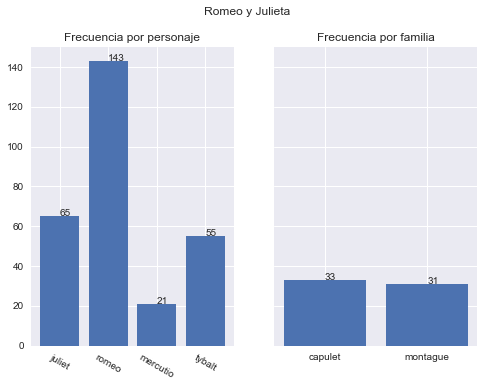

In [12]:
plt.style.use("seaborn")
fig = plt.figure() #Crea una figura vacia
fig, axes = plt.subplots(1, 2, sharey=True) #Queremos dos plots, uno al lado de otro
# axes es una tupla con una referencia a cada una de las gráficas
fig.suptitle("Romeo y Julieta") #Agrega el titulo principal
plt.sca(axes[0]) #Activa el primer plot
plt.xticks(rotation=-30) #Gira las leyendas del eje x
axes[0].bar(p_data.keys(), p_data.values()) #Crea grafica de barras
axes[0].set_title("Frecuencia por personaje") #Pone un titulo al plot
axes[1].bar(c_data.keys(), c_data.values()) #Crea grafica de barras
axes[1].set_title("Frecuencia por familia") #Pone un titulo al plot
# Los siguientes dos ciclos colocan el valor encima de cada columna
for columna, datos in enumerate(p_data.items()):
    axes[0].annotate(s=datos[1], xy=(columna, datos[1]))
for columna, datos in enumerate(c_data.items()):
    axes[1].annotate(s=datos[1], xy=(columna, datos[1]))

## Pandas y Matplotlib
Pandas integra la funcionalidad de Matplotlib en sus objetos DataFrame y Series, por lo que a veces obtener un gráfico con los datos de un objeto de Pandas es tan fácil como invocar el método `.plot()`.
Primero importamos Pandas de la forma acostumbrada:

In [13]:
import pandas as pd

Luego creamos un nuevo data frame:

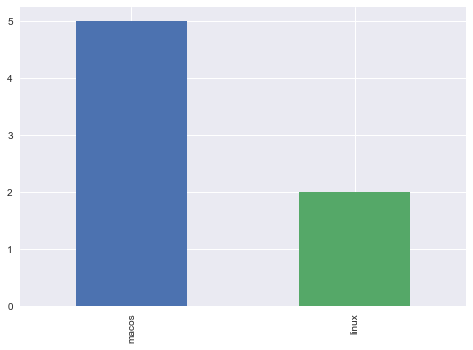

In [14]:
alumnos = {
    "nombre":{1:"cristina", 2:"moises",3:"fernando",4:"alejandro",
              5:"victoria", 6:"elba", 7:"paola"},
    "color":{1:"azul", 2:"rojo", 3:"amarillo", 4:"verde",
             5:"cafe", 6:"azul", 7:"morado"},
    "so": {1:"macos",2:"macos",3:"macos",4:"macos",5:"linux",
           6:"macos",7:"linux"}
}

alumnos_df = pd.DataFrame(alumnos, dtype='category')
alumnos_df.so.value_counts().plot(kind='bar')

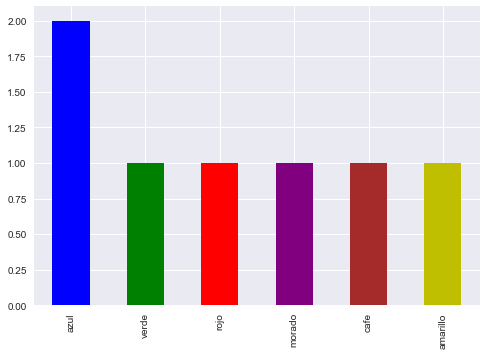

In [15]:
alumnos_df.color.value_counts().plot(kind='bar',
            color=('blue','g','r','purple','brown','y'))

También podemos hacer lo mismo con un DataFrame que hemos creado a partir de importar un archivo de datos:

In [16]:
capufe_df = pd.read_csv("CAPUFE-21201DGST13ZONA32PCTLALPAN.csv", #Esta línea especifica la ruta del archivo
                        encoding="latin1", #En este caso el archivo no contiene texto Unicode utf8, por lo que es necesario especificarle a Pandas que usaremos otra codificación
                        parse_dates=['Fecha de Inicio',
                                     'Fecha de Termino'], #También le vamos a indicar a Pandas las columnas que contienen las fechas
                        dtype={11:'object', 12:'object', 16:'object', 17:'object', 25:'category'}) #Podemos especificar el tipo de cada columna mediante el argumento dtype=
capufe_df.head()

CARRETERA                     TRAMO  KILOMETRO  \
0  México - Cuernavaca (Cuota)  México - T. Izq. Cuautla      23.36   
1  México - Cuernavaca (Cuota)  México - T. Izq. Cuautla      23.36   
2  México - Cuernavaca (Cuota)  México - T. Izq. Cuautla      23.36   
3  México - Cuernavaca (Cuota)  México - T. Izq. Cuautla      23.36   
4  México - Cuernavaca (Cuota)  México - T. Izq. Cuautla      23.36   

   DIAS DE LA SEMANA  SENTIDO  HORA Tipo  \
0                  2        1     0    A   
1                  2        1     0   11   
2                  2        1     0    8   
3                  2        1     0    8   
4                  2        1     0    7   

                               Tipo vehículo   LOCALIDAD_ORIGEN ESTADO-ORIGEN  \
0                       AUTOMOVIL PARTICULAR      Benito Juárez           D F   
1  TRACTOR DE 3 EJES SEMIRREMOLQUE DE 2 EJES      Benito Juárez           D F   
2                           CAMION DE 3 EJES      Benito Juárez           D F   
3                           CAMION DE 3 EJES    Toluca de Lerdo           MEX   
4                           CAMION DE 2 EJES  Heroica Zitácuaro          MICH   

        ...             W 2     W 3     W 4     W 5 W 6 W 7 W 8 W 9  \
0       ...             NaN     NaN     NaN     NaN NaN NaN NaN NaN   
1       ...         11327.0  8414.0  8827.0  7925.0 NaN NaN NaN NaN   
2       ...          3650.0  3666.0     NaN     NaN NaN NaN NaN NaN   
3       ...         11450.0  9299.0     NaN     NaN NaN NaN NaN NaN   
4       ...          6744.0     NaN     NaN     NaN NaN NaN NaN NaN   

  Fecha de Inicio Fecha de Termino  
0      2013-07-23       2013-07-28  
1      2013-07-23       2013-07-28  
2      2013-07-23       2013-07-28  
3      2013-07-23       2013-07-28  
4      2013-07-23       2013-07-28  

[5 rows x 42 columns]

In [17]:
list(enumerate(capufe_df.columns))

[(0, 'CARRETERA'),
 (1, 'TRAMO'),
 (2, 'KILOMETRO'),
 (3, 'DIAS DE LA SEMANA'),
 (4, 'SENTIDO'),
 (5, 'HORA'),
 (6, 'Tipo'),
 (7, 'Tipo vehículo'),
 (8, 'LOCALIDAD_ORIGEN'),
 (9, 'ESTADO-ORIGEN'),
 (10, 'CLAVE POBLACION-ORIGEN'),
 (11, 'Colonia_Origen'),
 (12, 'Delegación_Origen'),
 (13, 'LOCALIDAD_DESTINO'),
 (14, 'ESTADO-DESTINO'),
 (15, 'CLAVE POBLACION-DESTINO'),
 (16, 'Colonia_Destino'),
 (17, 'Delegación_Destino'),
 (18, 'Clave marca'),
 (19, 'Marca'),
 (20, 'AÑO'),
 (21, 'Clase combustible'),
 (22, 'Pasajeros'),
 (23, 'Tripulantes'),
 (24, 'Motivo de viaje'),
 (25, 'Clave carga'),
 (26, 'Carga'),
 (27, 'Cantidad'),
 (28, 'Unidad'),
 (29, 'Tonelada'),
 (30, 'Mercado'),
 (31, 'W 1'),
 (32, 'W 2'),
 (33, 'W 3'),
 (34, 'W 4'),
 (35, 'W 5'),
 (36, 'W 6'),
 (37, 'W 7'),
 (38, 'W 8'),
 (39, 'W 9'),
 (40, 'Fecha de Inicio'),
 (41, 'Fecha de Termino')]

Podemos dar un vistazo al contenido del este conjunto de datos usando dos filtros lógicos:

Text(0.5,1,'Hacia la CdMx')

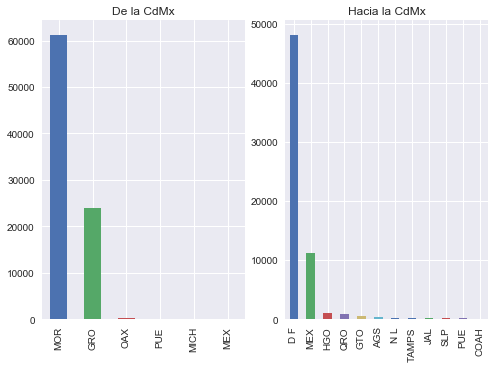

In [18]:
hacia_morelos = capufe_df["SENTIDO"] == 1 # Elegimos el sentido hacia Morelos
fig = plt.figure() # Inicializamos la figura
fig.add_subplot(1, 2, 1) # Creamos la primera gráfica
ax = capufe_df[hacia_morelos]["ESTADO-DESTINO"].value_counts().plot(kind='bar')
hacia_cdmx = capufe_df["SENTIDO"] == 2 # Elegimos el sentido hacia la CdMx
ax.set_title("De la CdMx")
fig.add_subplot(1, 2, 2) # Creamos la segunda gráfica
ax = capufe_df[hacia_cdmx]["ESTADO-DESTINO"].value_counts()["D F":"COAH"].plot(kind='bar')
ax.set_title("Hacia la CdMx")

In [19]:
periodo = capufe_df['Fecha de Termino'] - capufe_df['Fecha de Inicio']

En los datos que contiene este *dataset* podemos ver una gran disparidad entre los tipos de vehículos que cruzan por la caseta de cobro en las fechas seleccionadas, como muestra la siguiente gráfica:

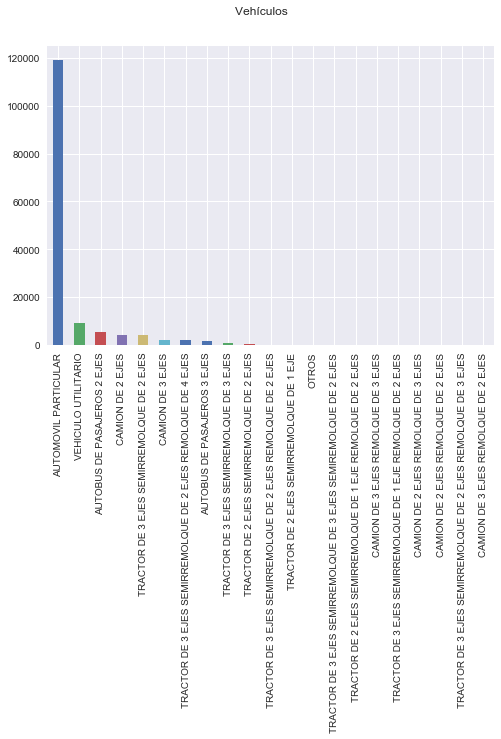

In [20]:
fig = plt.figure()
fig.suptitle("Vehículos ")
capufe_df['Tipo vehículo'].value_counts().plot(kind='bar')

## Gráficos en 3D con Matplotlib

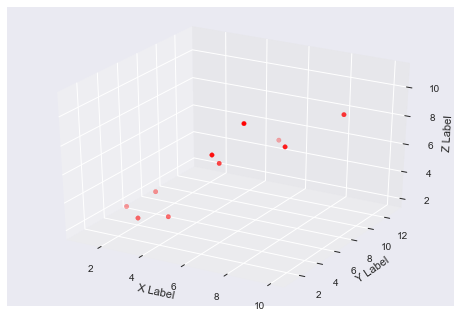

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()